[[33  1  2 ...  2  3  4]
 [17  1  3 ...  1  7  2]
 [35  1  4 ...  6  7  2]
 ...
 [25  2  4 ...  6  7  2]
 [18  2  6 ...  4  2  3]
 [47  1  6 ...  6  7  2]]
[0 0 1 0 1 0 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 1 0 1 1 1 0 0 0 1 1 1 0 0 1 1 0
 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0 0 0 0 0 0 1 1 0 1 1 0 1 0 1 1
 1 0 1 1 0 1 0 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 0 1 0 1 0 0 1 0 0 1 1 0 0
 1 1 0 0 1 0 0 0 1 1 1 0 0 1 1 1 1 1 1 0 1 0 0 0 1 1 0 1 1 0 1 1 0 1 0 1 1
 0 1 1 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 1 1 1
 0 0 1 1 1 0 1 1 1 1 1 1 0 1 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 1 0 1 0 0 1 0 0
 1 0 1 1 0 1 1 0 0 0 0 0 1 0 1 0 1 1 0 1 0 1 0 1 0 0 1 0 1 0 1 1 1 0 1 0 0
 1 0 0 0 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 1 0
 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 0 0 1 1 0 1 0 1 1 0 0 1 0 0 1 0 1 1 1 1 0 0
 1 1 1 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 0 1 1 1 0 1 0 1 0 0 0 0 1 1 1 0 0 0
 1 1 1 0 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 1 1 1 0 1 1 0 0
 1 0 1 0 0 1 0 0 0 

C:\Users\Divya Haridas\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


Grid Search Results
 

Best Params :  {'metric': 'minkowski', 'n_neighbors': 5}
Best Precision :  0.5496271112085984
Best Model: 
 KNeighborsClassifier()
Random Search Results
Best Params :  {'n_neighbors': 2, 'metric': 'manhattan'}
Best Precision :  0.5448101265822785
Best Model: 
 KNeighborsClassifier(metric='manhattan', n_neighbors=2)
Fine Tuned Model results


Confusion Matrix 
 [[110  40]
 [100  50]]

Classification Report : 
               precision    recall  f1-score   support

           0       0.52      0.73      0.61       150
           1       0.56      0.33      0.42       150

    accuracy                           0.53       300
   macro avg       0.54      0.53      0.51       300
weighted avg       0.54      0.53      0.51       300

Accuracy :  0.5333333333333333
AUC SCORE :  0.5202222222222223


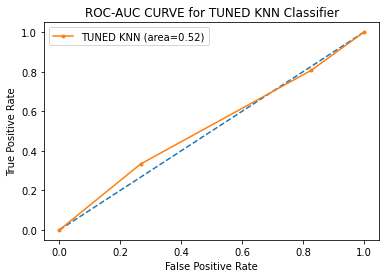

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
df = pd.read_csv(r"C:\Users\Divya Haridas\Desktop\cancer.csv")
df.head()
x = df.iloc[:, :-1].values
print(x)
y = df.iloc[:, -1].values
print(y)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42, stratify=y)
from sklearn.metrics import scorer
from time import time
knn = KNeighborsClassifier()
params = {'n_neighbors':range(2,11),'metric':['minkowski','manhattan','euclidean']}
grid_search = GridSearchCV(knn,param_grid = params,scoring='precision',cv=2)
grid_search.fit(x_train,y_train)
print("Grid Search Results\n \n")
print("Best Params : ",grid_search.best_params_)
print("Best Precision : ",grid_search.best_score_)
print("Best Model: \n",grid_search.best_estimator_)
knn = KNeighborsClassifier()
params = {'n_neighbors':np.arange(2,11,step=1),'metric':['minkowski','manhattan','euclidean']}
random_search = RandomizedSearchCV(knn,params,scoring='precision' ,cv=2)
random_search.fit(x_train,y_train)
print("Random Search Results")
print("Best Params : ",random_search.best_params_)
print("Best Precision : ",random_search.best_score_)
print("Best Model: \n",random_search.best_estimator_)
tuned_model = random_search.best_estimator_
y_pred = tuned_model.predict(x_test).flatten()
print("Fine Tuned Model results\n\n")
conf_mat=confusion_matrix(y_test,y_pred)
print("Confusion Matrix \n",conf_mat)
print("\nClassification Report : \n",classification_report(y_test,y_pred))
tuned_accuracy = (conf_mat[0][0]+conf_mat[1][1])/len(y_test)
print("Accuracy : " ,tuned_accuracy )
probs=tuned_model.predict_proba(x_test)
probs=probs[:,1]
fpr,tpr,_=roc_curve(y_test,probs)
random_probs = [0 for _ in range(len(y_test))]
p_fpr,p_tpr,_ = roc_curve(y_test,random_probs)
auc_score=roc_auc_score(y_test,probs)
print("AUC SCORE : " ,auc_score)
plt.plot(p_fpr, p_tpr, linestyle='--')
plt.plot(fpr, tpr, marker='.', label='TUNED KNN (area=%0.2f)'% auc_score)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC-AUC CURVE for TUNED KNN Classifier")
plt.legend()
plt.show()
